# 필요한 라이브러리 import

In [18]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 실습 및 검증용 데이터 iris

In [2]:
iris_df = load_iris(as_frame=True).frame

In [3]:
iris_df['target'] = iris_df['target'].map(lambda x : 'setosa' if x==0 else 'versicolor' if x == 1 else 'virginica')
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# sklearn의 PCA 돌려보기

## PCA은 스케일에 대한 영향이 크므로 스케일링 진행

In [4]:
# 표준정규분포의 범위로 스케일링
sc = StandardScaler()
iris_df.iloc[:,:-1] = sc.fit_transform(iris_df.iloc[:,:-1])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


## 2차원으로 PCA 차원축소

In [11]:
pca = PCA(n_components=2)

In [15]:
iris_pca=pd.DataFrame(pca.fit_transform(iris_df.iloc[:,:-1]),columns=['value1','value2'])

In [17]:
iris_pca['target'] = iris_df.loc[:,'target']
iris_pca

,value1,value2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


## 시각화

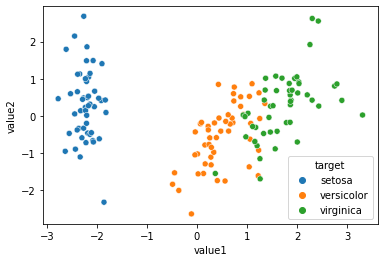

In [19]:
sns.scatterplot(x='value1',y='value2',hue='target',data=iris_pca)
plt.show()

# PCA 직접 만들어보기